In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
# Load the dataset
df=pd.read_csv('E:\Price_Predictorrr-main\Price_Predictorrr-main\washingmachine.csv')
df

,Description,Days,Price,AvailableOn,Rating,Comment
0,Semi Automatic Top Load,1,9965,Amazon,4,I didn't got the same product as it's showing ...
1,"1400 rpm : Higher the spin speed, lower the dr...",2,8340,Flipkart,5,I am writing this review after 1 month use of ...
2,Number of wash programs - 3,3,8523,Amazon,5,Semma super kandipa eallarum vagalam
3,5 Star Rating,4,9465,Amazon,4,Product is good and performing well.But check ...
4,7.5 kg,5,9215,Flipkart,5,Awesome product .Thanks Flipkart
...,...,...,...,...,...,...
360,NaN,361,9304,Amazon,5,very nice 👌👌
361,NaN,362,8060,Flipkart,1,Bluid quality is poor otherwise average
362,NaN,363,8471,Amazon,5,So nice
363,NaN,364,9922,Flipkart,4,Good quality value of money


In [6]:
# Prepare the data
X = df['Days'].values.reshape(-1, 1)
y = df['Price'].values.reshape(-1, 1)
description = df['Description']
rating = df['Rating']
comment = df['Comment']
available_on = df['AvailableOn']

In [7]:
# Create the linear regression model
model = LinearRegression()

In [8]:
# Fit the model to the data
model.fit(X, y)

LinearRegression()

In [9]:
# Predict the prices for the given days
predicted_prices = model.predict(X)

In [10]:
# Find the best price and corresponding day
best_price_index = y.argmin()
best_day = X[best_price_index][0]
best_price = y[best_price_index][0]
best_description = description[best_price_index]
best_available_on = available_on[best_price_index]

# Check if the description is NaN, if so, fallback to the first line description
if pd.isnull(best_description):
    best_description = description.iloc[0]

best_review = comment[best_price_index]
best_rating = rating[best_price_index]

print("Best price: {} on day {}".format(best_price, best_day))
print("Description: ", best_description)
print("Review: ", best_review)
print("Rating: ", best_rating)
print("Available On: ", best_available_on)

Best price: 8000 on day 184
Description:  Semi Automatic Top Load
Review:  Very good product quality is good
Rating:  5
Available On:  Flipkart


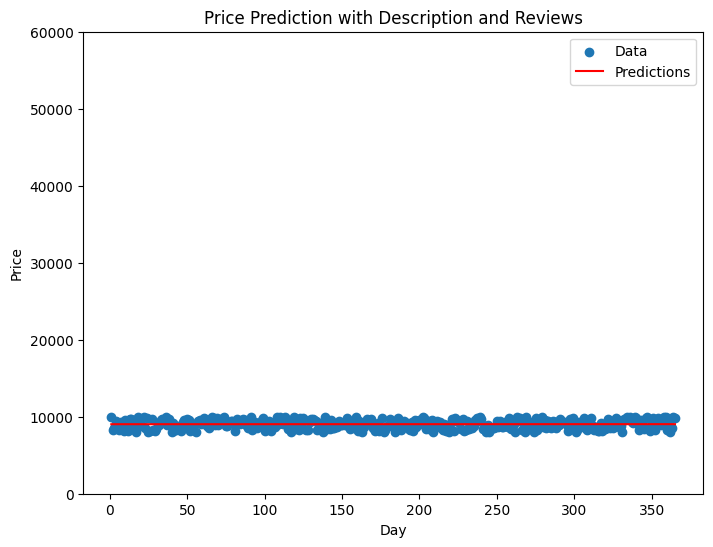

[[9032.32189412]]


In [11]:
# Plot the data and the predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data')
plt.plot(X, predicted_prices, color='red', label='Predictions')
plt.ylim(0, 60000)
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.title('Price Prediction with Description and Reviews')
plt.show()

print(model.predict([[250]]))

In [12]:
import pickle

# Save the trained model
pickle.dump(model, open('washingmachine.sav', 'wb'))
